<a href="https://colab.research.google.com/github/chaimaagassir/machine-learning/blob/main/Polynomial_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression Polynomial Iris Dataset
Prédire la largeur du sépale en fonction de la longueur du pétale


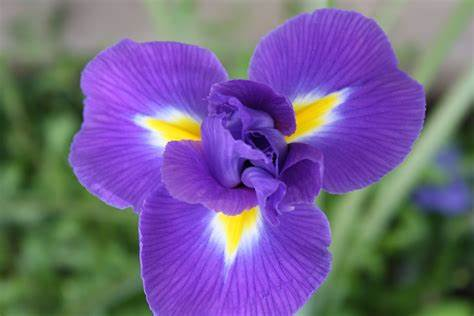



In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
%matplotlib inline

# 1. **`Dataset`**

In [ ]:
dataset=pd.read_csv("iris.csv")

In [ ]:
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


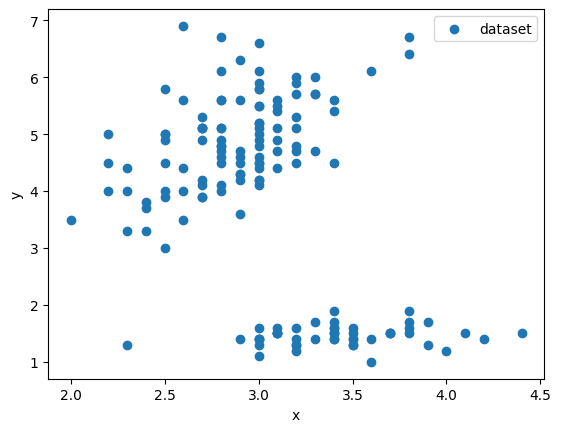

In [ ]:
x=dataset.sepal_width
y=dataset.petal_length
plt.scatter(x, y,label='dataset') # afficher les résultats. x en abscisse et y en ordonnée
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [ ]:
# Verification des dimensions
print(x.shape)
print(y.shape)


(150, 1)
(150,)


In [ ]:
X=dataset.sepal_width.values
X

array([3.5, 3. , 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1, 3.7, 3.4, 3. ,
       3. , 4. , 4.4, 3.9, 3.5, 3.8, 3.8, 3.4, 3.7, 3.6, 3.3, 3.4, 3. ,
       3.4, 3.5, 3.4, 3.2, 3.1, 3.4, 4.1, 4.2, 3.1, 3.2, 3.5, 3.1, 3. ,
       3.4, 3.5, 2.3, 3.2, 3.5, 3.8, 3. , 3.8, 3.2, 3.7, 3.3, 3.2, 3.2,
       3.1, 2.3, 2.8, 2.8, 3.3, 2.4, 2.9, 2.7, 2. , 3. , 2.2, 2.9, 2.9,
       3.1, 3. , 2.7, 2.2, 2.5, 3.2, 2.8, 2.5, 2.8, 2.9, 3. , 2.8, 3. ,
       2.9, 2.6, 2.4, 2.4, 2.7, 2.7, 3. , 3.4, 3.1, 2.3, 3. , 2.5, 2.6,
       3. , 2.6, 2.3, 2.7, 3. , 2.9, 2.9, 2.5, 2.8, 3.3, 2.7, 3. , 2.9,
       3. , 3. , 2.5, 2.9, 2.5, 3.6, 3.2, 2.7, 3. , 2.5, 2.8, 3.2, 3. ,
       3.8, 2.6, 2.2, 3.2, 2.8, 2.8, 2.7, 3.3, 3.2, 2.8, 3. , 2.8, 3. ,
       2.8, 3.8, 2.8, 2.8, 2.6, 3. , 3.4, 3.1, 3. , 3.1, 3.1, 3.1, 2.7,
       3.2, 3.3, 3. , 2.5, 3. , 3.4, 3. ])

In [ ]:
X.shape

(150,)

In [ ]:
#Redimensionner x et y
x=dataset.sepal_width.values.reshape(150,1)
y=dataset.sepal_width.values.reshape(150,1)

In [ ]:
print(x.shape)
print(y.shape)

(150, 1)
(150, 1)


In [ ]:
# Création de la matrice X, inclut le Biais
X = np.hstack((x, np.ones(x.shape)))
X = np.hstack((x**2, X)) # ajoute le vecteur x^2 a la gauche de la matrice X

print(X.shape)
print(X[:10])

(150, 3)
[[12.25  3.5   1.  ]
 [ 9.    3.    1.  ]
 [10.24  3.2   1.  ]
 [ 9.61  3.1   1.  ]
 [12.96  3.6   1.  ]
 [15.21  3.9   1.  ]
 [11.56  3.4   1.  ]
 [11.56  3.4   1.  ]
 [ 8.41  2.9   1.  ]
 [ 9.61  3.1   1.  ]]


In [ ]:
# Initialisation du vecteur theta aléatoire, avec 3 éléments (car X a trois colonnes)
theta = np.random.randn(3, 1)
theta

array([[-0.40211187],
       [ 0.81969037],
       [ 0.31895377]])

# **2. Modele linéaire**
On implémente un modèle selon l'équation matricielle F=X.θ et puis on teste le modèle initiale défini par la valeur initiale de θ qu'on a initialisé d'une manière aléatoire.

In [ ]:
def model(X, theta):
    return X.dot(theta)

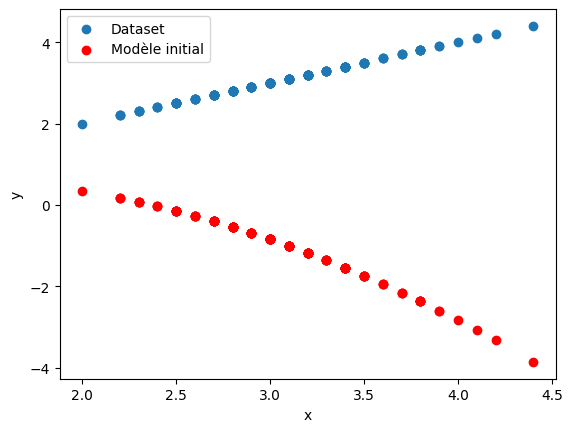

In [ ]:
plt.scatter(x, y,label='Dataset')
plt.scatter(x, model(X, theta), c='r',label='Modèle initial')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# **3. Fonction cout: Erreur Quadratique Moyenne**
On mesure les erreurs du modele sur le Dataset X, y en implémenterl'erreur quadratique moyenne, Mean Squared Error (MSE) en anglais. 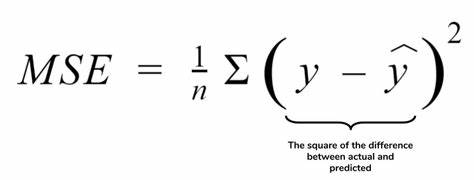

Ensuite, on teste notre fonction, pour voir s'il n'y a pas de bug

In [ ]:
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)

In [ ]:
cost_function(X, y, theta)

8.91435350982181

# **4. Gradients et Descent de Gradient**
On implémente la formule du gradient pour la MSE. Ensuite on utilise cette fonction dans la descente de gradient: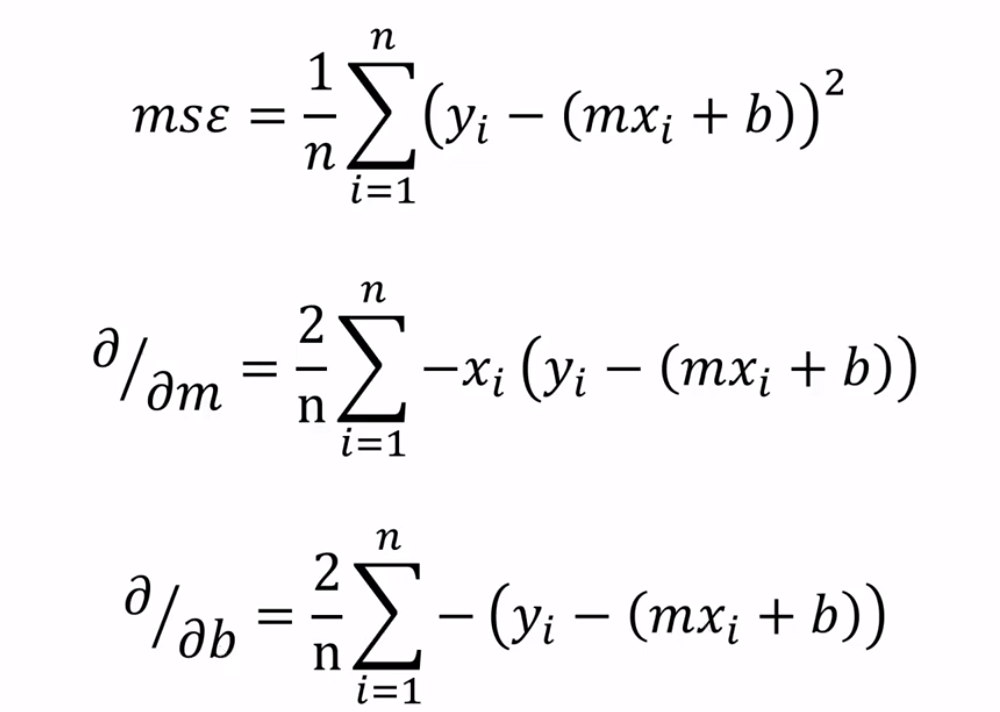

In [ ]:
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

In [ ]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    
    cost_history = np.zeros(n_iterations) # création d'un tableau de stockage pour enregistrer l'évolution du Cout du modele
    
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta) # mise a jour du parametre theta (formule du gradient descent)
        cost_history[i] = cost_function(X, y, theta) # on enregistre la valeur du Cout au tour i dans cost_history[i]
        
    return theta, cost_history

# **5. Phase d'entrainement**
On définit un nombre d'itérations, ainsi qu'un pas d'apprentissage α. Une fois le modele entrainé, on observe les resultats par rapport a notre Dataset

In [ ]:
n_iterations = 1000
learning_rate = 0.01

theta_final, cost_history = gradient_descent(X, y, theta, learning_rate, n_iterations)

In [ ]:
theta_final

array([[0.02360075],
       [0.83436412],
       [0.28325786]])

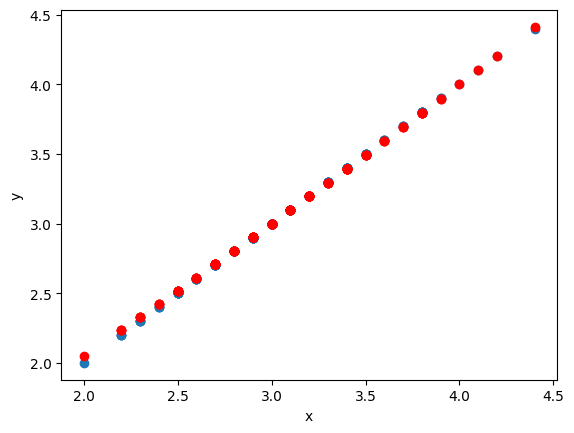

In [ ]:
# création d'un vecteur prédictions qui contient les prédictions de notre modele final
predictions = model(X, theta_final)

# Affiche les résultats de prédictions (en rouge) par rapport a notre Dataset (en bleu)
plt.scatter(x, y)
plt.scatter(x, predictions, c='r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# **6. Courbe d'apprentissage**
Pour vérifier si notre algorithme de Descente de gradient a bien fonctionné, on observe l'évolution de la fonction cout a travers les itérations. On est sensé obtenir une courbe qui diminue a chaque itération jusqu'a stagner a un niveau minimal (proche de zéro). Si la courbe ne suit pas ce motif, alors le pas learning_rate est peut-etre trop élevé, il faut prendre un pas plus faible.



plt.plot(range(n_iterations), cost_history)

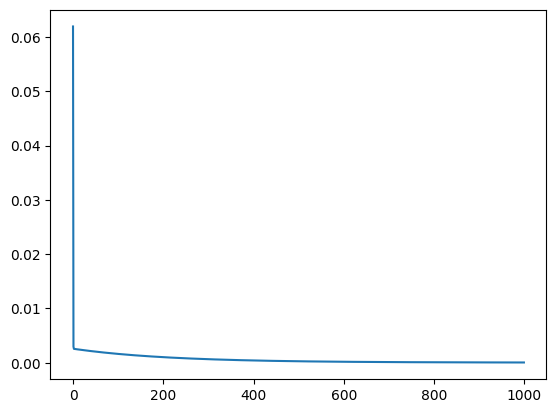

In [ ]:
plt.plot(range(n_iterations), cost_history)
plt.show()

# **7. Evaluation du modele - Coefficient de détérmination**
Le coefficient de détermination est un indice de la qualité de la prédiction de la régression polynomiale. Le coefficient de détermination se sit!ue entre 0 et 1. Plus il est proche de 1, plus la régression polynomiale est en adéquation avec les données collectées.

In [ ]:
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [ ]:
coef_determination(y, predictions)

0.9994302021357997

**Remarque:**
 On voit que le coefficient de détéremination a donné une valeur plus proche de 1, cela signifie que notre regression polynomiale est en adéquation avec les données collectées